In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
hp_train = pd.read_csv("House Price train (1).csv")
hp_test = pd.read_csv("House Price test (1).csv")

In [4]:
hp_train.shape, hp_test.shape

((1460, 81), (1459, 80))

## Data Preprocessing on Train data

In [5]:
hp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
hp_train.isnull().sum()[hp_train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
null_percent = hp_train.isnull().sum() * 100 / hp_train.shape[0] 
null_percent[null_percent > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:
# 'Alley', 'PoolQC', 'Fence', 'MiscFeature' these columns have more than 80% of nulls 
# drop thses columns

In [12]:
# delete those columns which has more nulls
hp_train = hp_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature' ], axis = 1)

In [9]:
hp_train.LotFrontage.fillna(hp_train.LotFrontage.median(), inplace=True)
hp_train.MasVnrType.fillna('NO', inplace=True )
hp_train.MasVnrArea.fillna(hp_train.MasVnrArea.median(), inplace=True )
hp_train.BsmtQual.fillna('None', inplace=True )
hp_train.BsmtCond.fillna('None', inplace=True )
hp_train.BsmtExposure.fillna('No', inplace=True )
hp_train.BsmtFinType1.fillna('None', inplace=True)
hp_train.BsmtFinType2.fillna('None', inplace=True)
hp_train.Electrical.fillna('SBrkr', inplace =True )
hp_train.FireplaceQu.fillna('None' , inplace =True )
hp_train.GarageType.fillna('Attchd', inplace =True )
hp_train.GarageYrBlt.fillna(0, inplace =True )
hp_train.GarageFinish.fillna('None', inplace =True )
hp_train.GarageQual.fillna('None', inplace =True )
hp_train.GarageCond.fillna('None', inplace =True )

In [13]:
hp_train.isnull().sum()[hp_train.isnull().sum() > 0]

Series([], dtype: int64)

In [15]:
# convert preprocessed hp_train data to csv for dashboarding
hp_train.to_excel("clean_train.xlsx", index=False )

In [12]:
# don't need to Id column so drop it
hp_train = hp_train.drop('Id', axis=1 )

In [13]:
# convert object columns to int or float
# select object columns
hp_train[hp_train.select_dtypes(include= 'object' ).columns ].head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
# apply label Encoder to convert all categorical columns to numerical
hp_train[hp_train.select_dtypes(include= 'object' ).columns ] = hp_train[hp_train.select_dtypes(include= 'object' ).columns ].apply(le.fit_transform)

In [16]:
hp_train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500


## Data Preprocessing on Test data

In [17]:
hp_test.isnull().sum()[hp_test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [18]:
hp_test = hp_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature' ], axis = 1)

In [19]:
hp_test.LotFrontage.fillna(hp_test.LotFrontage.median(), inplace=True)
hp_test.MasVnrType.fillna('NO', inplace=True )
hp_test.MasVnrArea.fillna(hp_test.MasVnrArea.median(), inplace=True )
hp_test.BsmtQual.fillna('None', inplace=True )
hp_test.BsmtCond.fillna('None', inplace=True )
hp_test.BsmtExposure.fillna('No', inplace=True )
hp_test.BsmtFinType1.fillna('None', inplace=True)
hp_test.BsmtFinType2.fillna('None', inplace=True)
hp_test.Electrical.fillna('SBrkr', inplace =True )
hp_test.FireplaceQu.fillna('None' , inplace =True )
hp_test.GarageType.fillna('Attchd', inplace =True )
hp_test.GarageYrBlt.fillna(0, inplace =True )
hp_test.GarageFinish.fillna('None', inplace =True )
hp_test.GarageQual.fillna('None', inplace =True )
hp_test.GarageCond.fillna('None', inplace =True )

In [20]:
hp_test.MSZoning.fillna('RL', inplace =True )
hp_test.Utilities.fillna('AllPub', inplace=True)
hp_test.Exterior1st.fillna('VinylSd', inplace =True )
hp_test.Exterior2nd.fillna('VinylSd', inplace =True )
hp_test.BsmtFinSF1.fillna(hp_test.BsmtFinSF1.median(), inplace =True )
hp_test.BsmtFinSF2.fillna(hp_test.BsmtFinSF2.median(), inplace =True )
hp_test.BsmtUnfSF.fillna(hp_test.BsmtUnfSF.median(), inplace =True )
hp_test.TotalBsmtSF.fillna(hp_test.TotalBsmtSF.median(), inplace =True )
hp_test.BsmtFullBath.fillna(0.0, inplace =True )
hp_test.BsmtHalfBath.fillna(0.0, inplace =True )
hp_test.KitchenQual.fillna('TA', inplace =True )
hp_test.Functional.fillna('Typ', inplace =True )
hp_test.GarageCars.fillna(2.0, inplace =True )
hp_test.GarageArea.fillna( hp_test.GarageArea.median(), inplace = True)
hp_test.SaleType.fillna('WD', inplace = True)

In [21]:
hp_test.isnull().sum()[hp_test.isnull().sum() > 0]

Series([], dtype: int64)

In [22]:
# apply label Encoder to convert all categorical columns to numerical
hp_test[hp_test.select_dtypes(include= 'object' ).columns ] = hp_test[hp_test.select_dtypes(include= 'object' ).columns ].apply(le.fit_transform)

In [23]:
hp_test.select_dtypes(include= 'object' ).columns

Index([], dtype='object')

### Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='SalePrice', ylabel='Count'>

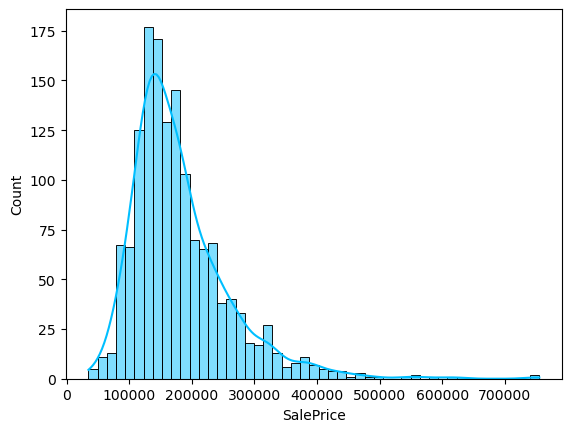

In [25]:
# check the sale price distribution
sns.histplot(hp_train.SalePrice, kde = True, color ='deepskyblue' )

<Axes: ylabel='SalePrice'>

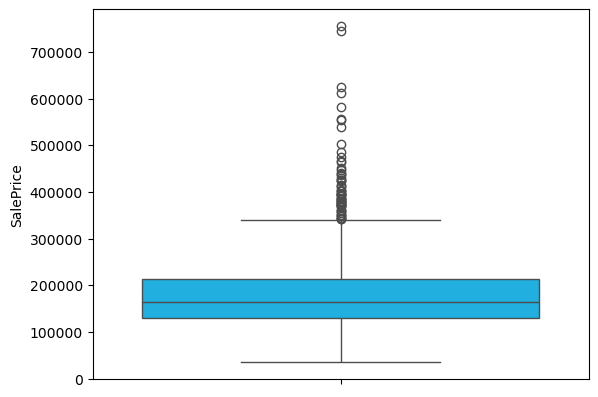

In [26]:
# check the outliers, min, max and median sale price 
sns.boxplot(hp_train.SalePrice, color ='deepskyblue' )

### Analysis

check the correlation to find important features.
In this dataset there are 81 columns and to find important features is diffucult task
so instead of finding overall corelation, 
find the correlation with respect to target column. salePrice is a target column

In [27]:
cols = hp_train.columns[:-1]

In [28]:
cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [29]:
corre = []
for i in cols:
    cor = hp_train.SalePrice.corr(hp_train[i])
    corre.append(cor)

In [30]:
# create dataframe using corelation
cor_df = pd.DataFrame()
cor_df['columns'] = cols
cor_df['corr'] = corre

In [31]:
# high correlation
correlation = cor_df[np.abs(cor_df['corr']) >= 0.5] 

In [32]:
correlation 

,columns,corr
15,OverallQual,0.790982
17,YearBuilt,0.522897
18,YearRemodAdd,0.507101
25,ExterQual,-0.636884
28,BsmtQual,-0.593734
36,TotalBsmtSF,0.613581
41,1stFlrSF,0.605852
44,GrLivArea,0.708624
47,FullBath,0.560664
51,KitchenQual,-0.589189


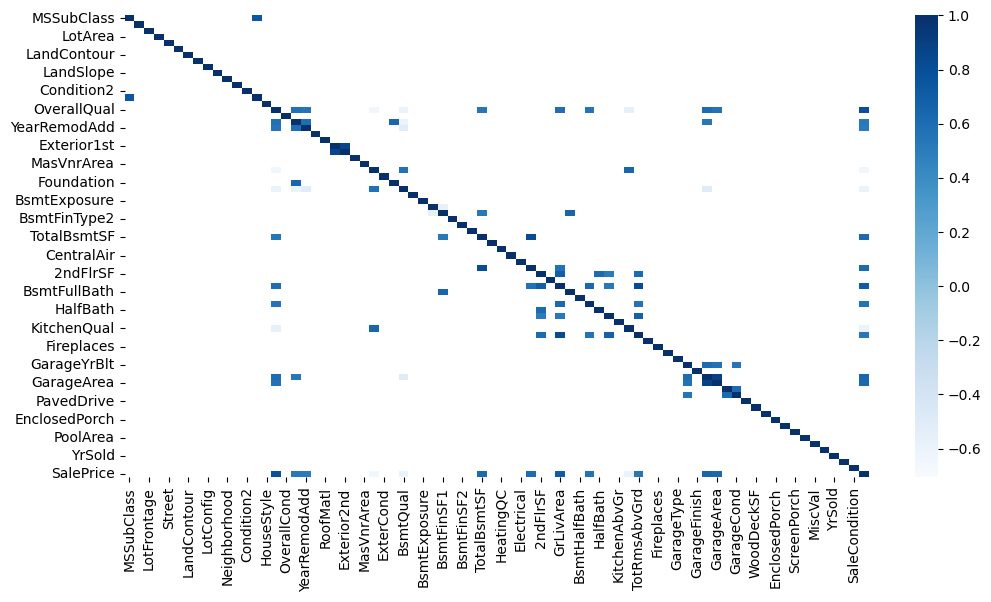

In [33]:
# heatmap using only highly corelation features
corr = hp_train.corr()
high_corr = corr[(corr > 0.5 ) | (corr < -0.5 ) ]

plt.figure(figsize=(12, 6))
sns.heatmap(high_corr, cmap ='Blues', annot =False)
plt.show()

In [34]:
# statistical analysis on high corelation columns
hp_train[correlation['columns']].describe()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,2.539726,2.724658,1057.429452,1162.626712,1515.463699,1.565068,2.339726,6.517808,1.767123,472.980137
std,1.382997,30.202904,20.645407,0.693995,1.278630,438.705324,386.587738,525.480383,0.550916,0.830161,1.625393,0.747315,213.804841
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5.000000,1954.000000,1967.000000,2.000000,2.000000,795.750000,882.000000,1129.500000,1.000000,2.000000,5.000000,1.000000,334.500000
50%,6.000000,1973.000000,1994.000000,3.000000,2.000000,991.500000,1087.000000,1464.000000,2.000000,3.000000,6.000000,2.000000,480.000000
75%,7.000000,2000.000000,2004.000000,3.000000,4.000000,1298.250000,1391.250000,1776.750000,2.000000,3.000000,7.000000,2.000000,576.000000
max,10.000000,2010.000000,2010.000000,3.000000,4.000000,6110.000000,4692.000000,5642.000000,3.000000,3.000000,14.000000,4.000000,1418.000000


## data spliting

In [35]:
x = hp_train.drop('SalePrice', axis=1)
y = hp_train.SalePrice

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .2, random_state=42)

In [38]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1168, 75), (292, 75), (1168,), (292,))

## model building and validation

### 1. Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()

In [40]:
le.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
le_pred = le.predict(x_val)

In [42]:
# R2 
r2 = le.score(x_train, y_train)
r2

0.8450764125335553

In [43]:
N = x_train.shape[0]
k = x_train.shape[1]

adj_r2 = 1 - ( (1-r2 ) * ( N-1) / (N - k- 1) )
adj_r2

0.8344360562515192

In [44]:
# calculate mse, rmse, mape
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

In [45]:
le_mse = mean_squared_error(y_val, le_pred)
le_rmse = root_mean_squared_error(y_val, le_pred)
le_mape = mean_absolute_percentage_error(y_val, le_pred)

In [46]:
print("mse : ", le_mse, "  rmse : ", le_rmse, "    mape : ", le_mape )
print("accuracy :", 100 - le_mape )

mse :  1154763839.077641   rmse :  33981.81630045165     mape :  0.12765390317501096
accuracy : 99.87234609682498


## 2. Random forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [48]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
rf_pred = rf.predict(x_val )

In [50]:
# R2 
rf_r2 = rf.score(x_train, y_train)
rf_r2

0.9794266170405286

In [51]:
N = x_train.shape[0]
k = x_train.shape[1]

adj_rfr2 = 1 - ( (1 - rf_r2 ) * ( N-1) / (N - k- 1) )
adj_rfr2

0.9780136099691363

In [52]:
rf_mse = mean_squared_error(y_val, rf_pred)
rf_rmse = root_mean_squared_error(y_val, rf_pred)
rf_mape = mean_absolute_percentage_error(y_val, rf_pred)

print("mse : ", rf_mse, "  rmse : ", rf_rmse, "    mape : ", rf_mape )
print("accuracy :", 100 - rf_mape )

mse :  792084891.9464017   rmse :  28144.002770508705     mape :  0.10635719746573107
accuracy : 99.89364280253427


## 3. XGBoost

In [53]:
from xgboost import XGBRegressor
xg = XGBRegressor()

In [54]:
xg.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [55]:
xg_pred = xg.predict( x_val)

In [56]:
# R2 
xg_r2 = rf.score(x_train, y_train)
xg_r2

0.9794266170405286

In [57]:
N = x_train.shape[0]
k = x_train.shape[1]

adj_xgr2 = 1 - ( (1 - xg_r2 ) * ( N-1) / (N - k- 1) )
adj_xgr2

0.9780136099691363

In [58]:
xg_mse = mean_squared_error(y_val, xg_pred)
xg_rmse = root_mean_squared_error(y_val, xg_pred)
xg_mape = mean_absolute_percentage_error(y_val, xg_pred)

print("mse : ", xg_mse, "  rmse : ", xg_rmse, "    mape : ", xg_mape )
print("accuracy :", 100 - xg_mape )

mse :  668964096.0   rmse :  25864.33984375     mape :  0.10758800804615021
accuracy : 99.89241199195385


### Feature Importance

In [59]:
rf.feature_importances_

array([2.26841972e-03, 1.03100333e-03, 9.10985969e-03, 1.59900876e-02,
       1.21545291e-05, 1.35282039e-03, 1.58309230e-03, 0.00000000e+00,
       1.03458829e-03, 5.39855372e-04, 9.30955833e-03, 5.22089446e-04,
       1.81634367e-06, 3.92862971e-04, 6.07318812e-04, 5.44451286e-01,
       4.74500168e-03, 1.36516609e-02, 6.50896682e-03, 9.42144100e-04,
       1.26748749e-04, 1.63704248e-03, 1.34610415e-03, 9.20729182e-04,
       3.94224698e-03, 2.73519378e-03, 3.49652430e-04, 6.49729040e-04,
       7.80580568e-03, 4.10239746e-04, 3.62462845e-03, 1.41307610e-03,
       2.63017717e-02, 3.65703024e-04, 5.15772425e-04, 5.59968513e-03,
       3.40951678e-02, 3.66091254e-05, 9.17358836e-04, 3.13548932e-03,
       1.80176486e-04, 3.27170833e-02, 3.22064331e-02, 8.92657917e-05,
       1.29170255e-01, 9.61665888e-04, 1.64478734e-04, 1.04704937e-02,
       7.55394804e-04, 1.59725120e-03, 6.23333610e-04, 2.35438483e-03,
       6.46182246e-03, 5.36929791e-04, 3.71112969e-03, 1.49788619e-03,
      

In [60]:
fea_imp = pd.DataFrame()
fea_imp['Features'] = x_train.columns
fea_imp['Imp'] =   rf.feature_importances_

In [61]:
fea_imp.sort_values('Imp',  ascending = False )

,Features,Imp
15,OverallQual,0.544451
44,GrLivArea,0.129170
36,TotalBsmtSF,0.034095
41,1stFlrSF,0.032717
42,2ndFlrSF,0.032206
...,...,...
70,MiscVal,0.000072
37,Heating,0.000037
4,Street,0.000012
12,Condition2,0.000002


In [62]:
imp_df = fea_imp[fea_imp.Imp >= .01 ]
imp_df

,Features,Imp
3,LotArea,0.015990
15,OverallQual,0.544451
17,YearBuilt,0.013652
32,BsmtFinSF1,0.026302
36,TotalBsmtSF,0.034095
41,1stFlrSF,0.032717
42,2ndFlrSF,0.032206
44,GrLivArea,0.129170
47,FullBath,0.010470
59,GarageCars,0.016250


#### create new dataframe using important features

In [63]:
imp_x_train = x_train[imp_df['Features']]

In [64]:
imp_x_train.head()

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
254,8400,5,1957,922,1314,1314,0,1314,1,1,294
1066,7837,6,1993,0,799,799,772,1571,2,2,380
638,8777,5,1910,0,796,796,0,796,1,0,0
799,7200,5,1937,569,731,981,787,1768,1,1,240
380,5000,5,1924,218,1026,1026,665,1691,2,1,308


In [65]:
imp_x_val = x_val[imp_df['Features']]
imp_x_val.head()

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
892,8414,6,1963,663,1059,1068,0,1068,1,1,264
1105,12256,8,1994,1032,1463,1500,1122,2622,2,2,712
413,8960,5,1927,0,1008,1028,0,1028,1,2,360
522,5000,6,1947,399,1004,1004,660,1664,2,2,420
1036,12898,9,2007,1022,1620,1620,0,1620,2,3,912


### Rebuiid our models

###  Linear Regression

In [66]:
le.fit(imp_x_train, y_train)
le_train = le.predict(imp_x_val)

# R2 
r2 = le.score(imp_x_train, y_train)
r2

0.7751627191562243

In [67]:
N = imp_x_train.shape[0]
k = imp_x_train.shape[1]

adj_r2 = 1 - ( (1-r2 ) * ( N-1) / (N - k- 1) )
adj_r2

0.7730232640616901

In [68]:
le_mse = mean_squared_error(y_val, le_train)
le_rmse = root_mean_squared_error(y_val, le_train)
le_mape = mean_absolute_percentage_error(y_val, le_train)

print("mse : ", le_mse, "  rmse : ", le_rmse, "    mape : ", le_mape )
print("accuracy :", 100 - le_mape )

mse :  1499678379.7345488   rmse :  38725.68113971075     mape :  0.14575245413793037
accuracy : 99.85424754586207


### Random Forest

In [69]:
rf.fit(imp_x_train, y_train)
rf_train = rf.predict(imp_x_val)

r2 = rf.score(imp_x_train, y_train)
r2

0.9757822274745828

In [70]:
N = imp_x_train.shape[0]
k = imp_x_train.shape[1]

adj_r2 = 1 - ( (1 - r2 ) * ( N-1) / (N - k- 1) )
adj_r2

0.9755517815422475

In [71]:
rf_mse = mean_squared_error(y_val, rf_train)
rf_rmse = root_mean_squared_error(y_val, rf_train)
rf_mape = mean_absolute_percentage_error(y_val, rf_train)

print("mse : ", rf_mse, "  rmse : ", rf_rmse, "    mape : ", rf_mape )
print("accuracy :", 100 - rf_mape )

mse :  855058958.1618608   rmse :  29241.391180343333     mape :  0.11721826415215143
accuracy : 99.88278173584784


### XGBoost

In [72]:
xg.fit(imp_x_train, y_train)
xg_train = rf.predict(imp_x_val)

xg_r2 = xg.score(imp_x_train, y_train)
xg_r2

0.9991275668144226

In [73]:
N = imp_x_train.shape[0]
k = imp_x_train.shape[1]

adj_r2 = 1 - ( (1 - xg_r2 ) * ( N-1) / (N - k- 1) )
adj_r2

0.9991192651145598

In [74]:
xg_mse = mean_squared_error(y_val, xg_train)
xg_rmse = root_mean_squared_error(y_val, xg_train)
xg_mape = mean_absolute_percentage_error(y_val, xg_train)

print("mse : ", xg_mse, "  rmse : ", xg_rmse, "    mape : ", xg_mape )
print("accuracy :", 100 - xg_mape )

mse :  855058958.1618608   rmse :  29241.391180343333     mape :  0.11721826415215143
accuracy : 99.88278173584784


 - after analyzing above models conclusion is that performance of Random Forest and XGBoost is good
 - after building models using important features both models gives less rmse and mape than linear regression.
 - feature importance overcome the complexity of model and overfitting problems.
 - model building with important features gives the best results.

- XGBoost r2=0.99, and random forest r2 =0.97
- Higher r2 with no increment of rmse is better model
- so XGBoost is best model for prediction.

### Predict sale price on test data

In [75]:
final_test = hp_test[imp_df['Features']]
final_test.head()

,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
0,11622,5,1961,468.0,882.0,896,0,896,1,1.0,730.0
1,14267,6,1958,923.0,1329.0,1329,0,1329,1,1.0,312.0
2,13830,5,1997,791.0,928.0,928,701,1629,2,2.0,482.0
3,9978,6,1998,602.0,926.0,926,678,1604,2,2.0,470.0
4,5005,8,1992,263.0,1280.0,1280,0,1280,2,2.0,506.0


In [76]:
test_pred = xg.predict(final_test)

In [77]:
test_pred

array([135820.77 , 165898.83 , 186839.78 , ..., 157407.72 , 116312.164,
       219773.33 ], dtype=float32)

In [78]:
output = pd.DataFrame({
    'Id': hp_test['Id'],
    'SalesPrice': test_pred
})


In [88]:
output.to_excel("Final_Predictions.xlsx", index=False )
print("Prediction file created: Final_Predictions.csv")

Prediction file created: Final_Predictions.csv


In [90]:
# export your feature importance result
imp_df.to_excel("feature_importance.xlsx", index=False )